In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv(".\CareerMapping.csv")

In [4]:
y = data.pop("Role")

In [5]:
y

0       Database Administrator
1       Database Administrator
2       Database Administrator
3       Database Administrator
4       Database Administrator
                 ...          
9174         Graphics Designer
9175         Graphics Designer
9176         Graphics Designer
9177         Graphics Designer
9178         Graphics Designer
Name: Role, Length: 9179, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)


In [7]:
original_labels = label_encoder.classes_
label_mapping = {i: label for i, label in enumerate(original_labels)}
print(label_mapping)

{0: 'AI ML Specialist', 1: 'API Specialist', 2: 'Application Support Engineer', 3: 'Business Analyst', 4: 'Customer Service Executive', 5: 'Cyber Security Specialist', 6: 'Database Administrator', 7: 'Graphics Designer', 8: 'Hardware Engineer', 9: 'Helpdesk Engineer', 10: 'Information Security Specialist', 11: 'Networking Engineer', 12: 'Project Manager', 13: 'Software Developer', 14: 'Software tester', 15: 'Technical Writer'}


In [8]:
y_train_encoded

array([6, 6, 6, ..., 7, 7, 7])

In [9]:
x_train,x_temp,y_train,y_temp=train_test_split(data,y_train_encoded,test_size=0.5)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.6)

In [9]:
tree_classifier = DecisionTreeClassifier(max_depth=10)
tree_classifier.fit(x_train, y_train)
y_train_pred = tree_classifier.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = tree_classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.7186750926127696
0.6978939724037764


[[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0

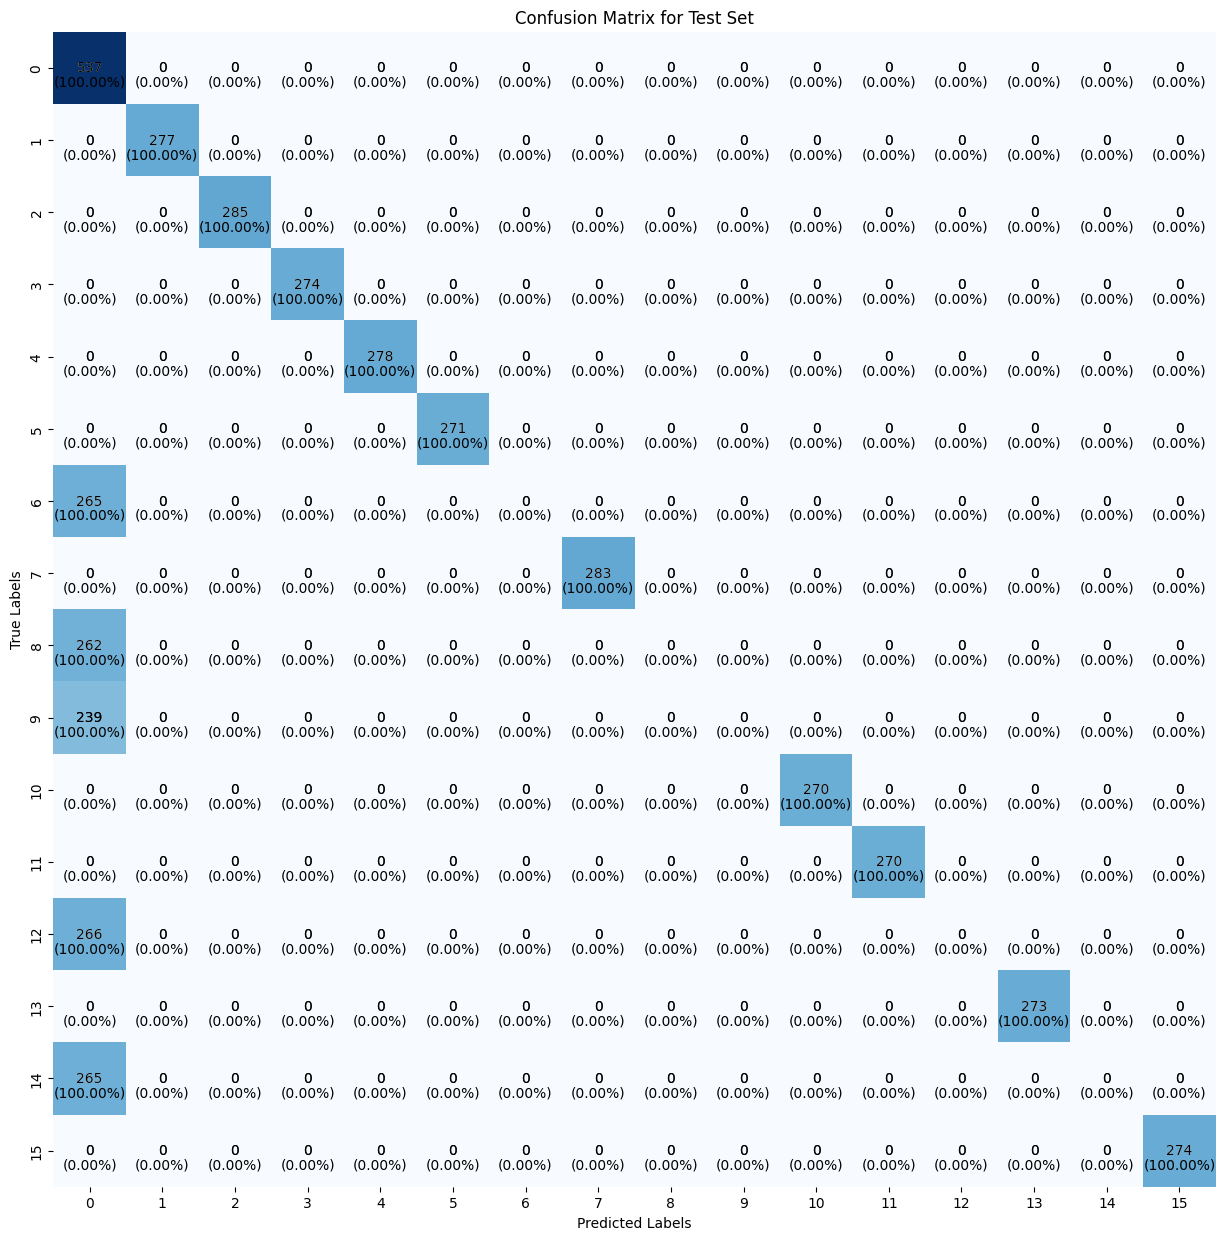

In [22]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

[[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0

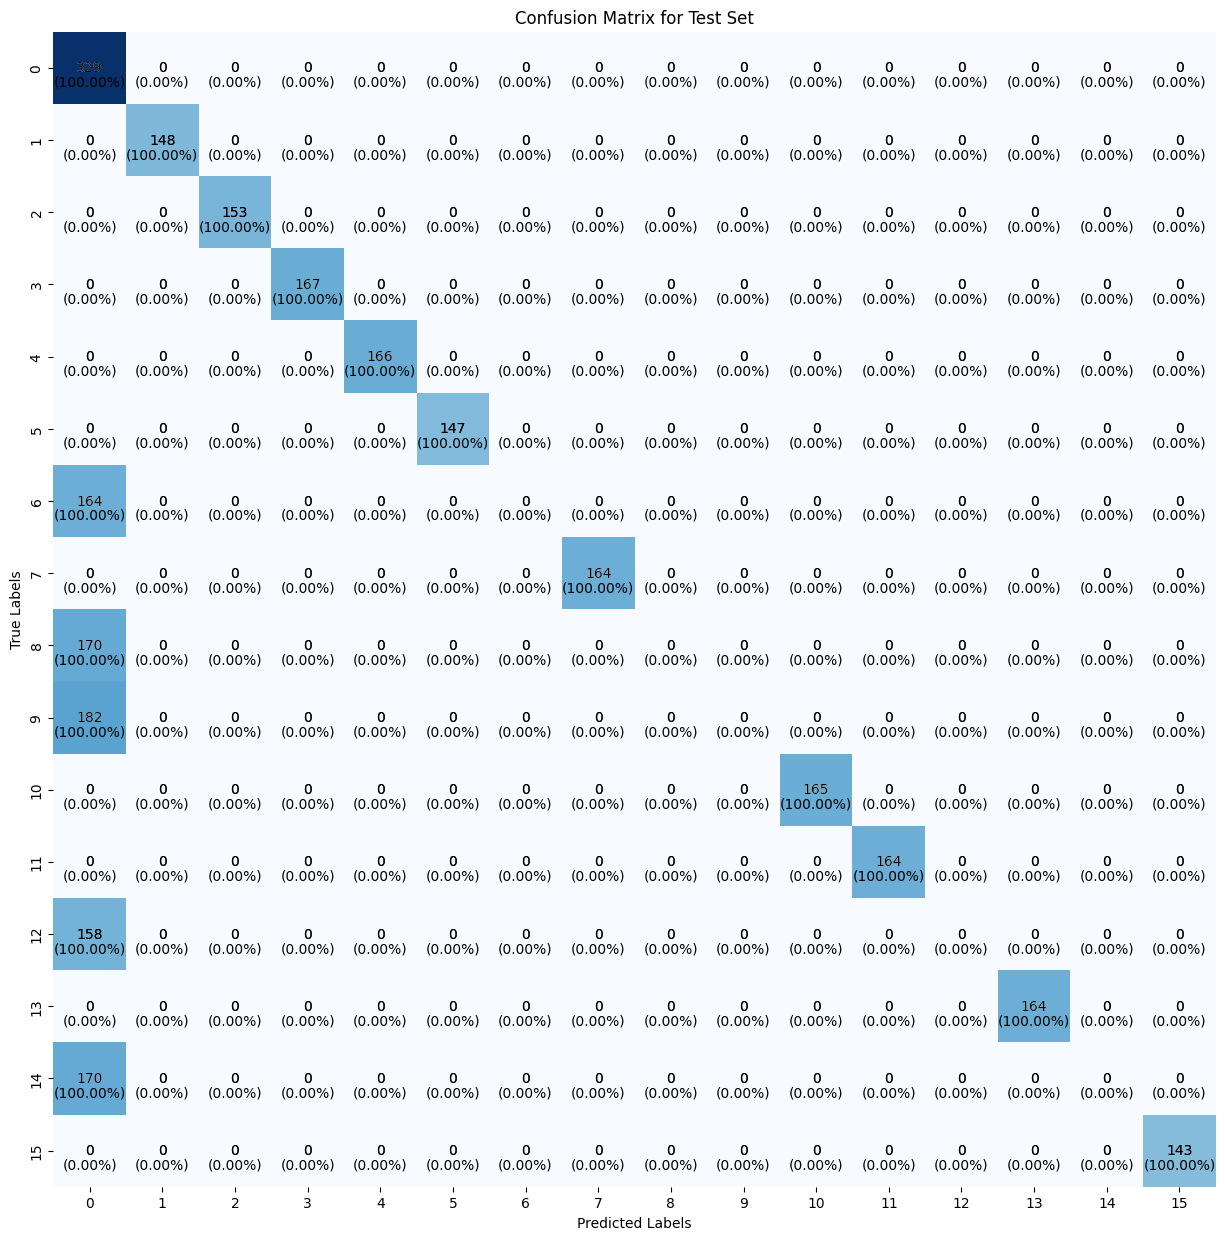

In [21]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [23]:
tree_classifier = DecisionTreeClassifier(max_depth=12)
tree_classifier.fit(x_train, y_train)
y_train_pred = tree_classifier.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = tree_classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.8330791022009152
0.8126361655773421


[[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0

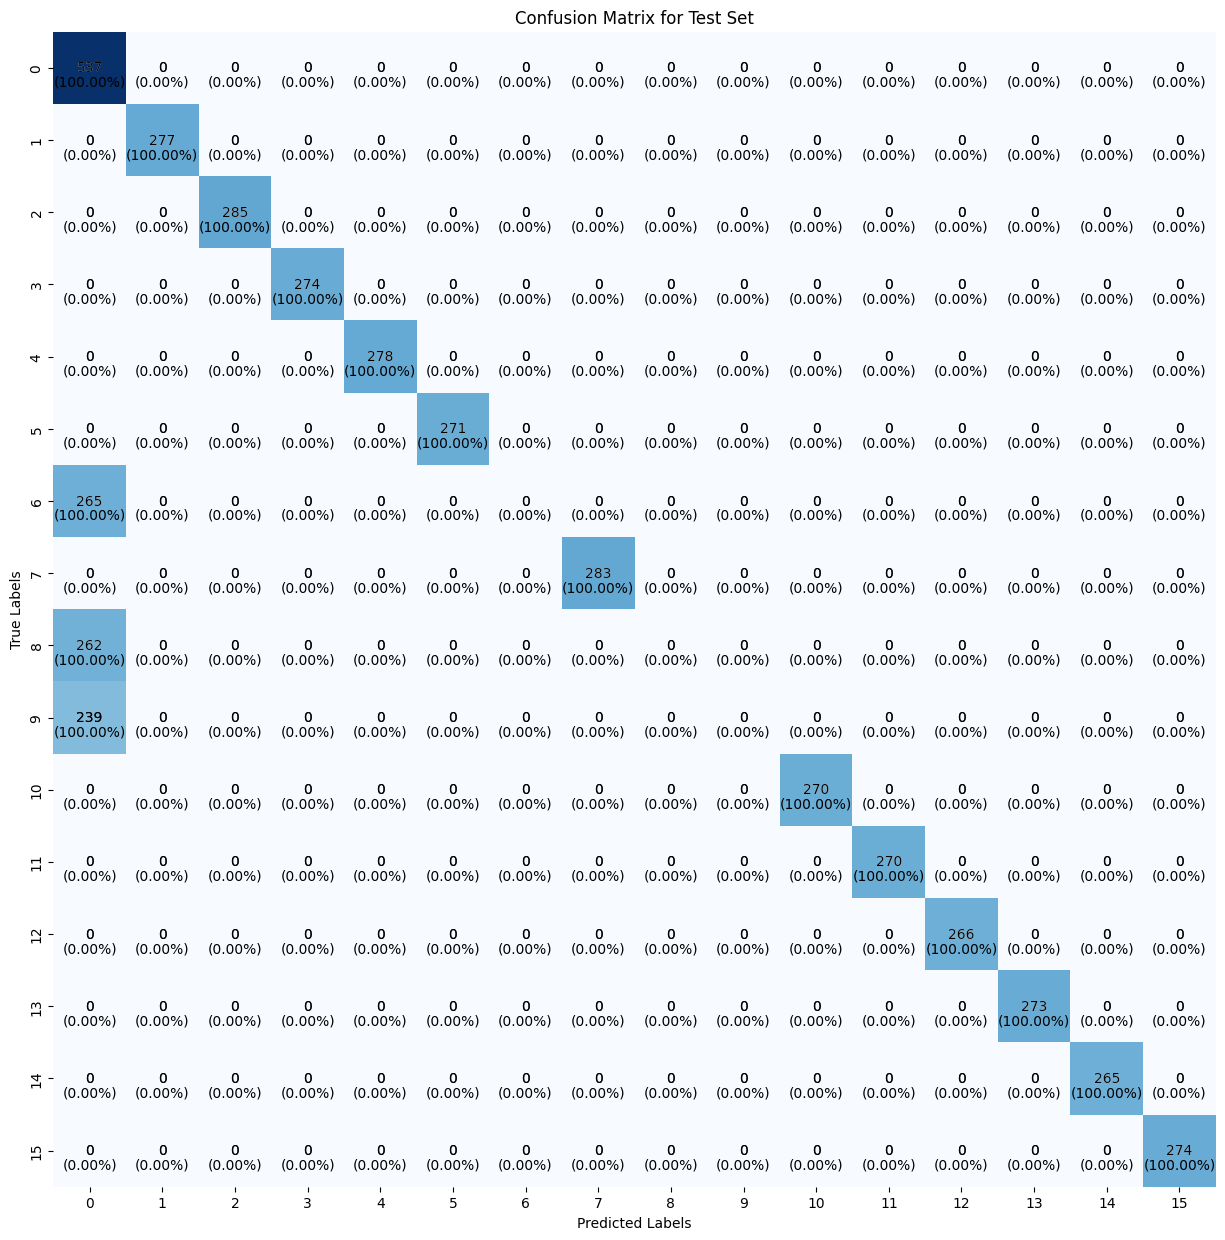

In [24]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

[[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0

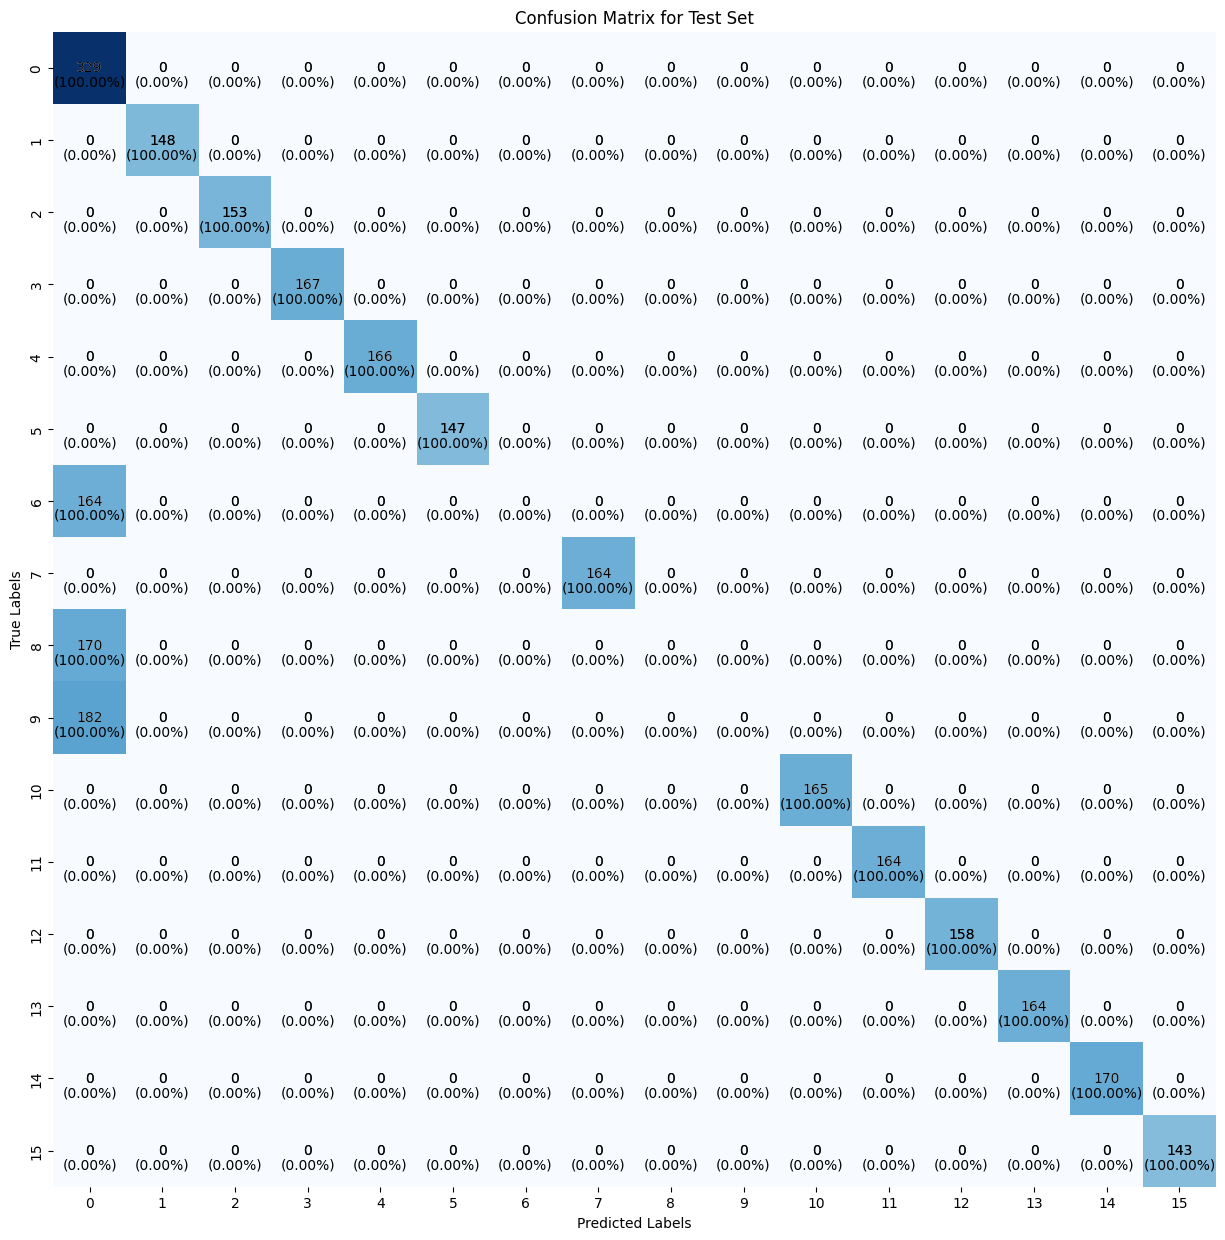

In [25]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [10]:
tree_classifier = DecisionTreeClassifier(max_depth=15)
tree_classifier.fit(x_train, y_train)
y_train_pred = tree_classifier.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = tree_classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

1.0
1.0


[[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0

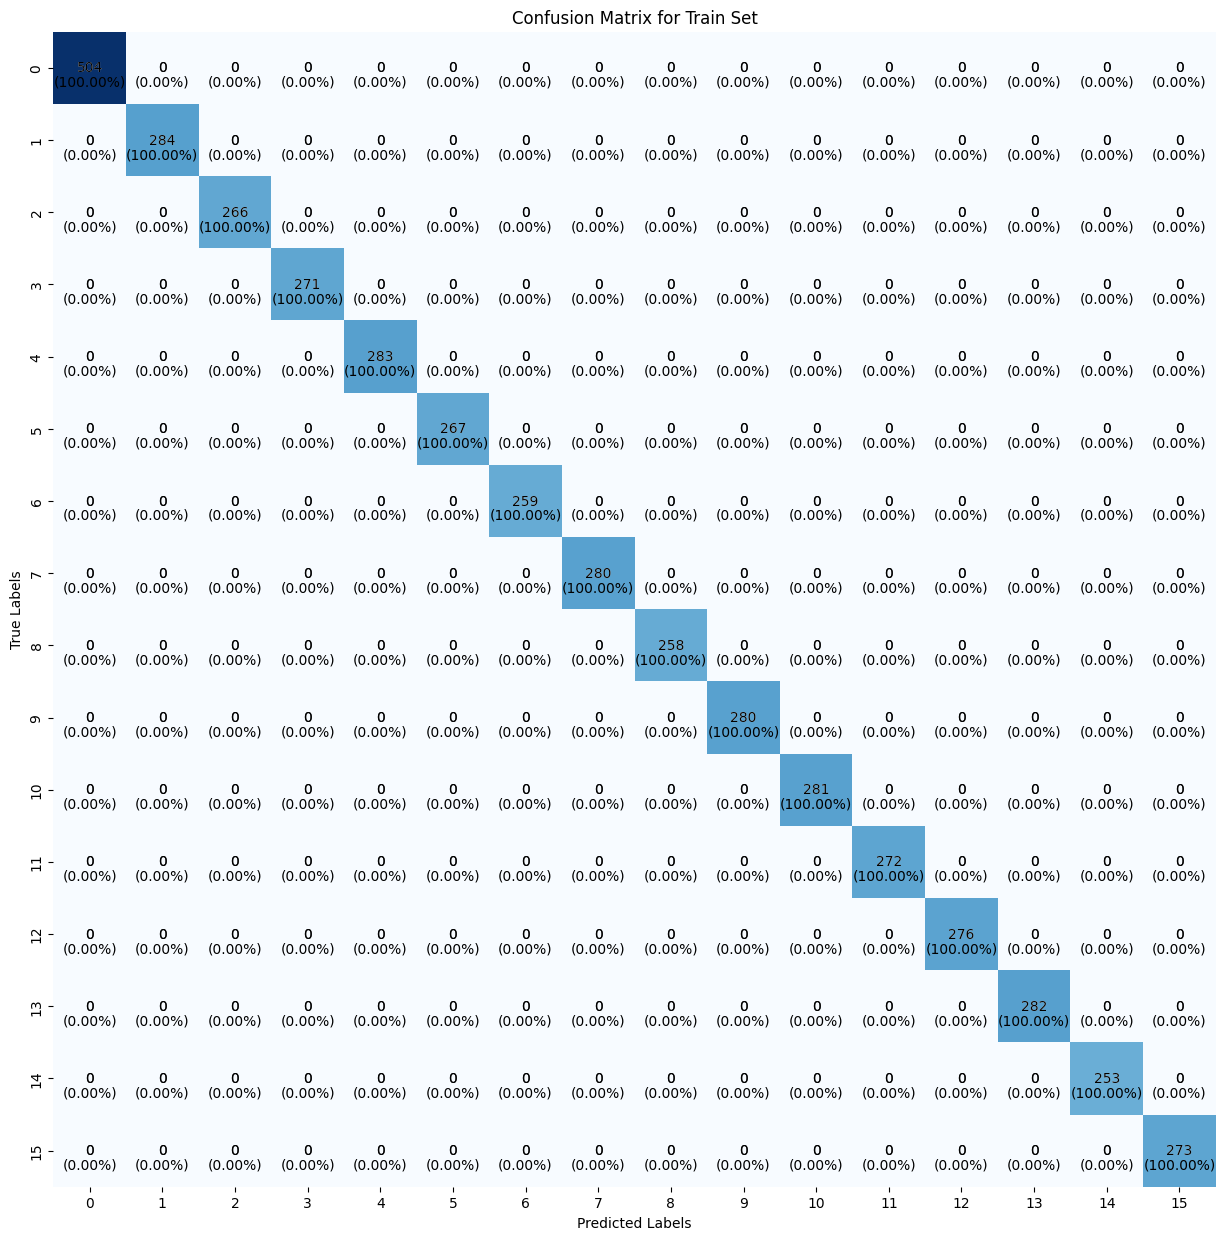

In [12]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

[[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0

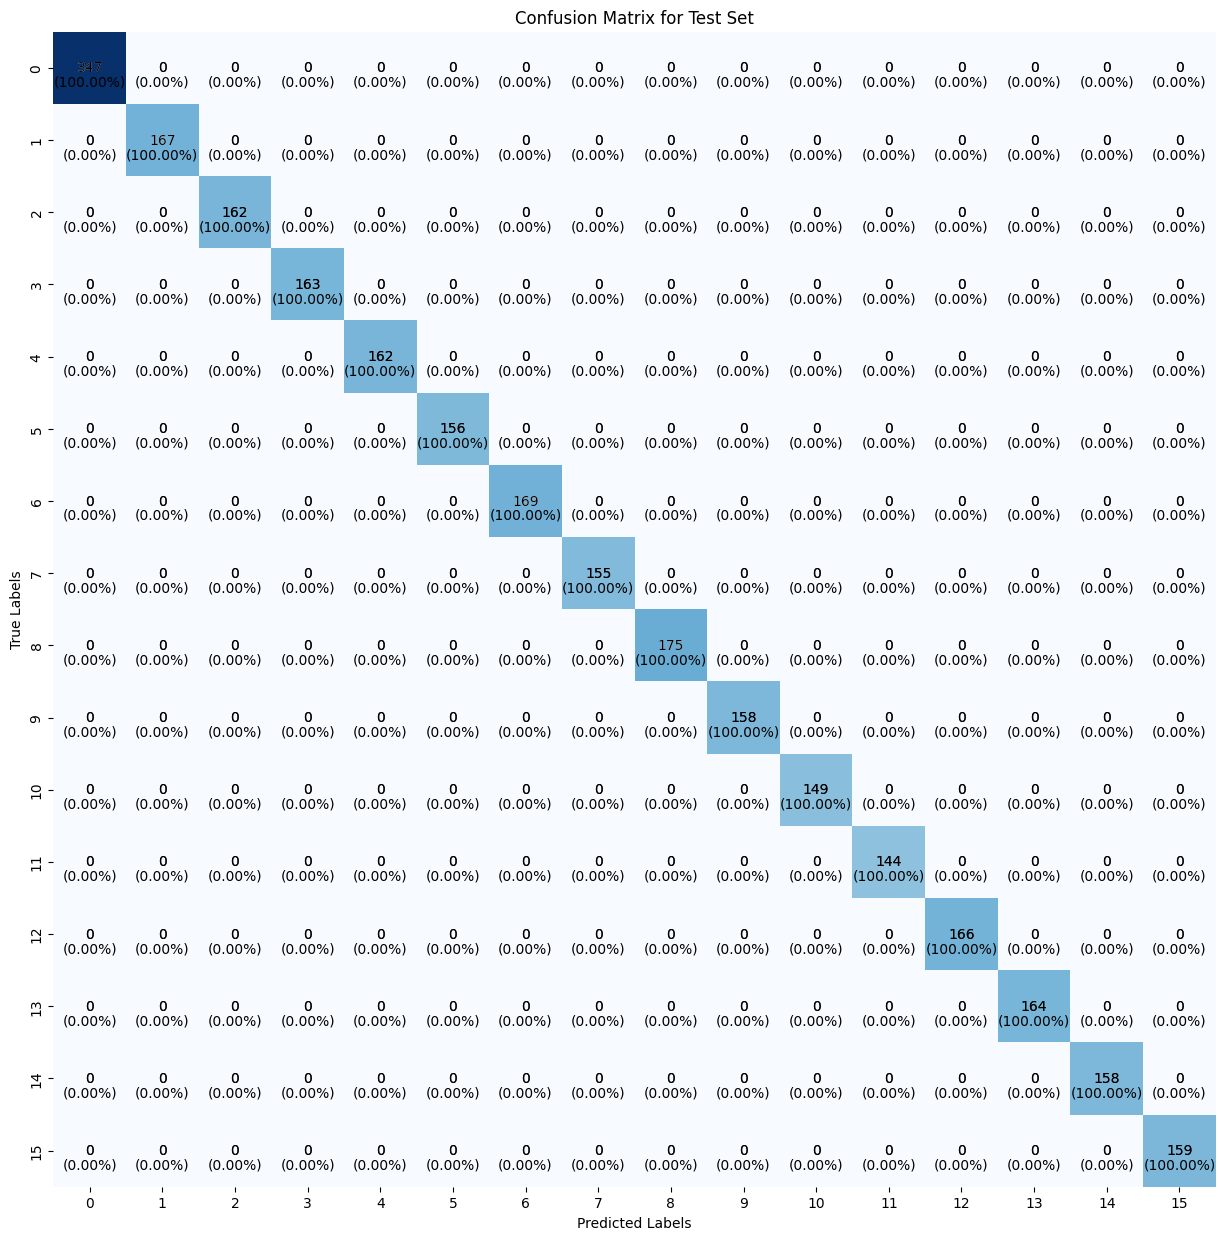

In [13]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [ ]:
# rf = RandomForestClassifier()
# rf.fit(x_train,y_train)
# y_train_pred = rf.predict(x_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# y_test_pred = rf.predict(x_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(train_accuracy)
# print(test_accuracy)

In [ ]:
# conf_matrix = confusion_matrix(y_test, y_test_pred)
# row_sums = conf_matrix.sum(axis=1, keepdims=True)
# conf_matrix_percent = conf_matrix / row_sums * 100
# print(conf_matrix_percent)

# plt.figure(figsize=(15, 15))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
#                  horizontalalignment="center",
#                  verticalalignment="center", color="black", fontsize=10)
#         plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
#                  horizontalalignment="center",
#                  verticalalignment="center", color="black", fontsize=10)

# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix for Test Set')
# plt.show()

#Parameter Tuning

In [15]:
maximum_depth = [j for j in range(10,100,5)]
for i in maximum_depth:
    tree_classifier = DecisionTreeClassifier(max_depth=i)
    tree_classifier.fit(x_train, y_train)
    y_train_pred = tree_classifier.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_val_pred = tree_classifier.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f" Train accuracy and Val accuracy for depth {i} is {train_accuracy} and {val_accuracy}")

 Train accuracy and Val accuracy for depth 10 is 0.7173676182174765 and 0.6955337690631809
 Train accuracy and Val accuracy for depth 15 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 20 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 25 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 30 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 35 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 40 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 45 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 50 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 55 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 60 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 65 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 70 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 75 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 80 is 1.0 and 1.0
 Train accuracy and Val accuracy for depth 85 is 1.0 an

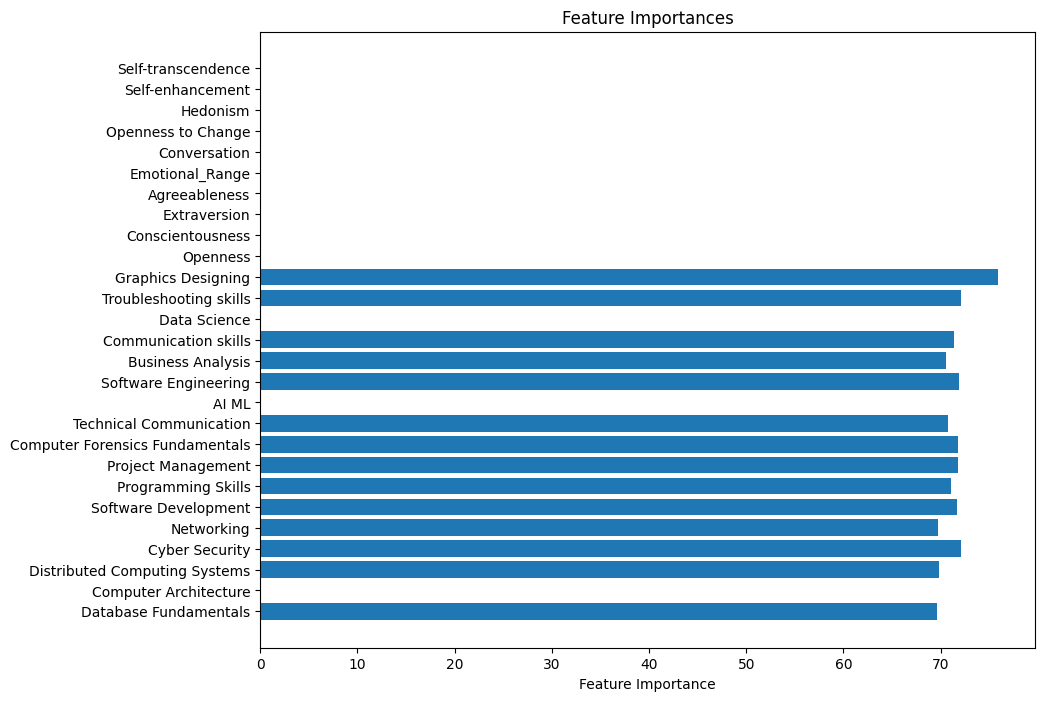

In [11]:
a=tree_classifier.feature_importances_

data = a * 1000
labels = ['Database Fundamentals', 'Computer Architecture',
       'Distributed Computing Systems', 'Cyber Security', 'Networking',
       'Software Development', 'Programming Skills', 'Project Management',
       'Computer Forensics Fundamentals', 'Technical Communication', 'AI ML',
       'Software Engineering', 'Business Analysis', 'Communication skills',
       'Data Science', 'Troubleshooting skills', 'Graphics Designing',
       'Openness', 'Conscientousness', 'Extraversion', 'Agreeableness',
       'Emotional_Range', 'Conversation', 'Openness to Change', 'Hedonism',
       'Self-enhancement', 'Self-transcendence']

indices = range(len(data))

plt.figure(figsize=(10, 8))
plt.barh(indices, data, align='center')
plt.yticks(indices, labels)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()
